In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("./test_images/elon_musk.jpg")
img.shape #will show RGB values

(194, 259, 3)

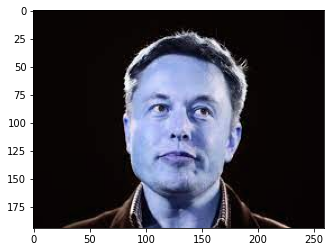

In [3]:
plt.imshow(img) #To show image

In [4]:
#For gray or black and white
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(194, 259)

In [5]:
gray #A 3D array of image

array([[4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=uint8)

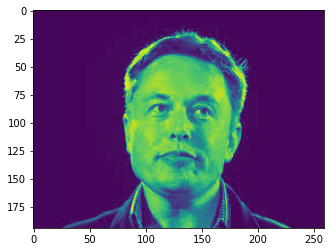

In [6]:
plt.imshow(gray) #with to RGB value

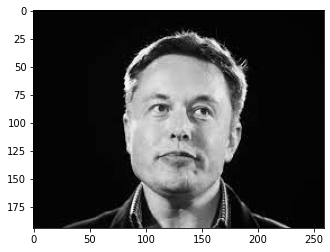

In [7]:
plt.imshow(gray, cmap='gray') #For gray image

In [8]:
#For face detection using Haar Cascades
#Loading facecascade & eyecascade for face detection

face_cascade = cv2.CascadeClassifier("./openCV/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./openCV/haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces #4 values X , Y and Width and Height

array([[ 71,  37, 121, 121]])

In [9]:
#Detecting the first face
(x,y,w,h) = faces[0]

x,y,w,h

(71, 37, 121, 121)

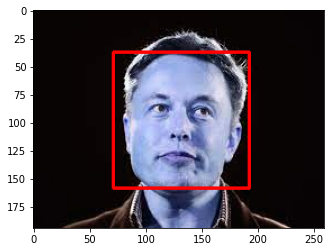

In [10]:
#Croping the face only face extraction

face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

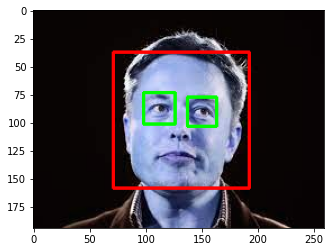

In [11]:
#Draw for Eye detection 

cv2.destroyAllWindows()

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

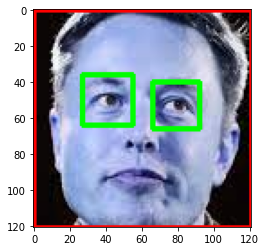

In [12]:
#Cropped image
plt.imshow(roi_color, cmap='gray')

In [13]:
#Function to return cropped faceImage

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if(len(eyes) >=2):
            return roi_color



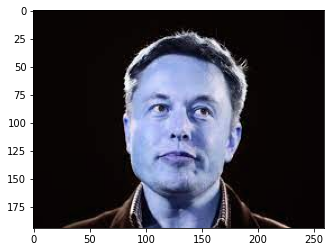

In [14]:
#Checking function

original_image = cv2.imread('./test_images/elon_musk.jpg')
plt.imshow(original_image)

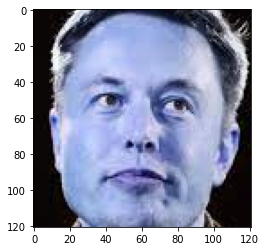

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/elon_musk.jpg')
plt.imshow(cropped_image)

In [16]:
#Initializing path valiables

path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [17]:
#Getting all directories of founders under dataset

import os
img_dirs =list()

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./dataset/Billl_Gates',
 './dataset/Elon_Musk',
 './dataset/Larry_Page',
 './dataset/Ratan_Tata',
 './dataset/Steve_Jobs']

In [19]:
#Creating cropped folder to store only face cropped images

import shutil

if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs = list()
founders_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    founder_name = img_dir.split('/')[-1]
    print(founder_name)
    
    founders_file_names_dict[founder_name] = list()
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if(roi_color is not None):
            cropped_folder = path_to_cr_data + founder_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generated Cropped images in folder : ", cropped_folder)
            cropped_file_name = founder_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            founders_file_names_dict[founder_name].append(cropped_file_path)
            count = count + 1

Billl_Gates
Generated Cropped images in folder :  ./dataset/cropped/Billl_Gates
Elon_Musk
Generated Cropped images in folder :  ./dataset/cropped/Elon_Musk
Larry_Page
Generated Cropped images in folder :  ./dataset/cropped/Larry_Page
Ratan_Tata
Generated Cropped images in folder :  ./dataset/cropped/Ratan_Tata
Steve_Jobs
Generated Cropped images in folder :  ./dataset/cropped/Steve_Jobs


# Feature Engineering 

In [32]:
#Performing WaveLet Tranformation pywt = py wavelet transform
import pywt

def w2d(img , mode='haar',level=1):
    imArray = img
    #Converting to grayScale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #to FLOAT
    imArray = np.float32(imArray)
    imArray /= 255;
    #compute coefficient
    coeffs = pywt.wavedec2(imArray, mode,level=level)
    
    #process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H,mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H


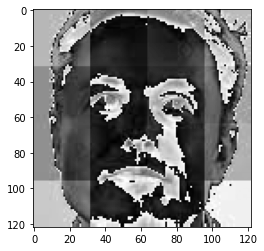

In [35]:
#Converting image using Wavelet transformer 
# Extracting important facial features

im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [36]:
class_dict = {}
count = 0

for founder_name in founders_file_names_dict.keys():
    class_dict[founder_name] = count
    count = count + 1

class_dict

{'Billl_Gates': 0,
 'Elon_Musk': 1,
 'Larry_Page': 2,
 'Ratan_Tata': 3,
 'Steve_Jobs': 4}

In [37]:
X = list()
y = list()

for founder_name, training_files in founders_file_names_dict.items():
    for training_images in training_files:
        #resizing
        img = cv2.imread(training_images)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img ,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[founder_name])

In [42]:
len(X) #No of cropped images

108

In [44]:
len(X[0]) #size of each image 32*32*3 + 32*32

4096

In [47]:
#Converting to float

X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(108, 4096)

In [48]:
X[0]

array([ 87.,  67., 109., ..., 248., 246., 246.])

# Training model (SVM)

In [49]:
#importing modules
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [51]:
#Spliting train and test

X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=0)

#Pipelining and scaling

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train,y_train)

pipe.score(X_test,y_test)

0.7407407407407407

In [53]:
len(X_test) #Tested 27 images only a good score

27

In [54]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.73      1.00      0.84        19
           2       0.00      0.00      0.00         1
           3       1.00      0.25      0.40         4
           4       0.00      0.00      0.00         3

    accuracy                           0.74        27
   macro avg       0.43      0.31      0.31        27
weighted avg       0.66      0.74      0.65        27



c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [56]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [57]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\python39\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.703676,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.689706,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.516176,{'logisticregression__C': 1}


In [58]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [59]:
best_estimators['svm'].score(X_test,y_test)

0.7407407407407407

In [60]:
best_estimators['random_forest'].score(X_test,y_test)

0.7037037037037037

In [61]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7407407407407407

In [63]:
best_clf = best_estimators['svm']

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[19,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 3,  0,  1,  0],
       [ 3,  0,  0,  0]], dtype=int64)

Text(69.0, 0.5, 'Truth')

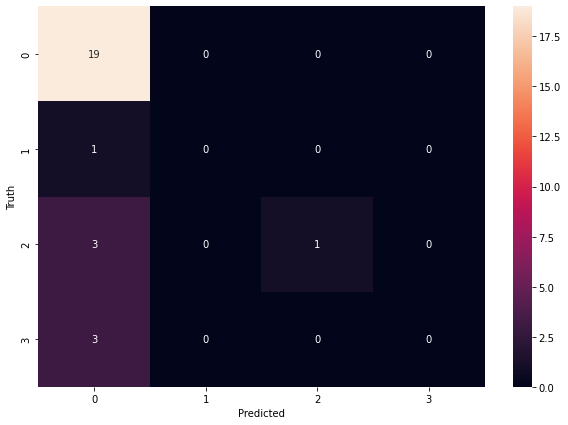

In [65]:
#HeatMAP
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
class_dict

{'Billl_Gates': 0,
 'Elon_Musk': 1,
 'Larry_Page': 2,
 'Ratan_Tata': 3,
 'Steve_Jobs': 4}

In [67]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [68]:
#Saving class dictionary
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))